In [1]:
cd ..

/home/jorge/DocumentsWLS/Data_Science_Projects/Geospatial-similarity-combining-TDA-LLM-agents-and-MLOps-workflows


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df1 = pd.read_parquet('flask_app/results/confianza_matrix.parquet')
df2 = pd.read_parquet('flask_app/results/similarity_matrix.parquet')


In [3]:
import numpy as np

# máscara que excluye la diagonal
mask = ~np.eye(*df1.shape, dtype=bool)
values_filtered = df1.values[mask]

mean = np.nanmean(values_filtered)
std = np.nanstd(values_filtered)
min_val = np.nanmin(values_filtered)
max_val = np.nanmax(values_filtered)

nan_count = np.isnan(values_filtered).sum()
nan_percentage = (nan_count / values_filtered.size) * 100

print(f"Promedio: {mean:.4f}")
print(f"Desv. Estándar: {std:.4f}")
print(f"Mínimo: {min_val:.4f}")
print(f"Máximo: {max_val:.4f}")
print(f"NaNs: {nan_count} ({nan_percentage:.2f}%)")


Promedio: 89.6563
Desv. Estándar: 8.6336
Mínimo: 17.3187
Máximo: 100.0000
NaNs: 3195 (1.16%)



====== RESUMEN ESTADÍSTICO ======
Promedio:          89.6563
Desv. Estándar:    8.6336
Mínimo:            17.3187
Máximo:            100.0000
NaNs:              3195 (1.16%)
IQR:               10.6905
Outliers (IQR):    8597

--- Percentiles ---
P 1: 60.3229
P 5: 72.9531
P25: 85.4679
P50: 91.7284
P75: 96.1583
P95: 99.2469
P99: 99.8607


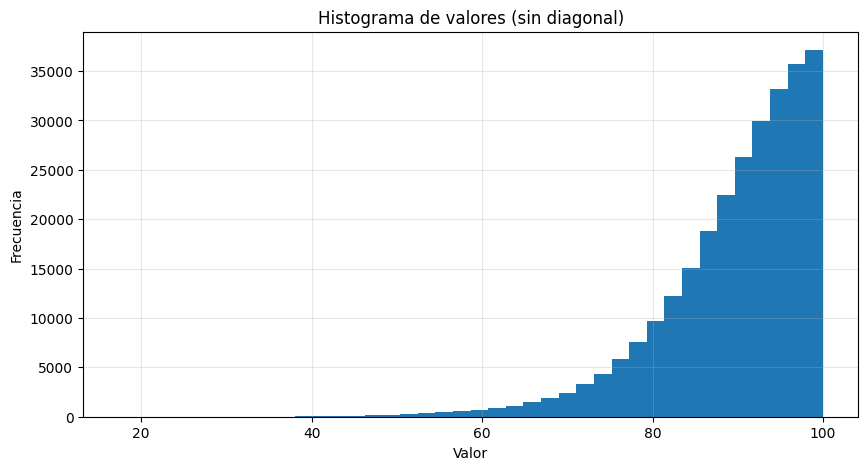

{'mean': 89.65629481733755,
 'std': 8.633599408465757,
 'min': 17.318666458129883,
 'max': 100.0,
 'nan_count': 3195,
 'nan_pct': 1.1605479093791886,
 'percentiles': {1: 60.32289123535156,
  5: 72.95310401916504,
  25: 85.46786880493164,
  50: 91.7284049987793,
  75: 96.15833473205566,
  95: 99.2469253540039,
  99: 99.86066474914551},
 'outliers': 8597}

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def analizar_matriz(df):
    """
    Analiza distribución de valores en la matriz excluyendo la diagonal.
    Produce métricas estadísticas y gráficos.
    """

    # ----------------------
    # 1. Filtrar datos (sin diagonal)
    # ----------------------
    mask = ~np.eye(*df.shape, dtype=bool)
    values = df.values[mask].astype(float)

    # ----------------------
    # 2. Métricas básicas
    # ----------------------
    mean = np.nanmean(values)
    std = np.nanstd(values)
    min_val = np.nanmin(values)
    max_val = np.nanmax(values)

    # ----------------------
    # 3. Percentiles clave
    # ----------------------
    percentiles = [1, 5, 25, 50, 75, 95, 99]
    perc_vals = np.nanpercentile(values, percentiles)

    # ----------------------
    # 4. NaNs
    # ----------------------
    nan_count = np.isnan(values).sum()
    nan_pct = nan_count / len(values) * 100

    # ----------------------
    # 5. Outliers (IQR)
    # ----------------------
    Q1 = np.nanpercentile(values, 25)
    Q3 = np.nanpercentile(values, 75)
    IQR = Q3 - Q1
    outlier_low = Q1 - 1.5 * IQR
    outlier_high = Q3 + 1.5 * IQR
    outliers = np.sum((values < outlier_low) | (values > outlier_high))

    # ----------------------
    # 6. Impresión de métricas
    # ----------------------
    print("\n====== RESUMEN ESTADÍSTICO ======")
    print(f"Promedio:          {mean:.4f}")
    print(f"Desv. Estándar:    {std:.4f}")
    print(f"Mínimo:            {min_val:.4f}")
    print(f"Máximo:            {max_val:.4f}")
    print(f"NaNs:              {nan_count} ({nan_pct:.2f}%)")
    print(f"IQR:               {IQR:.4f}")
    print(f"Outliers (IQR):    {outliers}")

    print("\n--- Percentiles ---")
    for p, v in zip(percentiles, perc_vals):
        print(f"P{p:>2}: {v:.4f}")

    # ----------------------
    # 7. Histograma
    # ----------------------
    plt.figure(figsize=(10,5))
    plt.hist(values[~np.isnan(values)], bins=40)
    plt.title("Histograma de valores (sin diagonal)")
    plt.xlabel("Valor")
    plt.ylabel("Frecuencia")
    plt.grid(alpha=0.3)
    plt.show()


    return {
        "mean": mean,
        "std": std,
        "min": min_val,
        "max": max_val,
        "nan_count": nan_count,
        "nan_pct": nan_pct,
        "percentiles": dict(zip(percentiles, perc_vals)),
        "outliers": outliers,
    }

# ---- EJEMPLO DE USO ----
analizar_matriz(df1)


====== RESUMEN ESTADÍSTICO ======
Promedio:          0.7612
Desv. Estándar:    0.0741
Mínimo:            0.2735
Máximo:            1.0000
NaNs:              0 (0.00%)
IQR:               0.0891
Outliers (IQR):    7789

--- Percentiles ---
P 1: 0.5182
P 5: 0.6255
P25: 0.7236
P50: 0.7751
P75: 0.8127
P95: 0.8530
P99: 0.8784


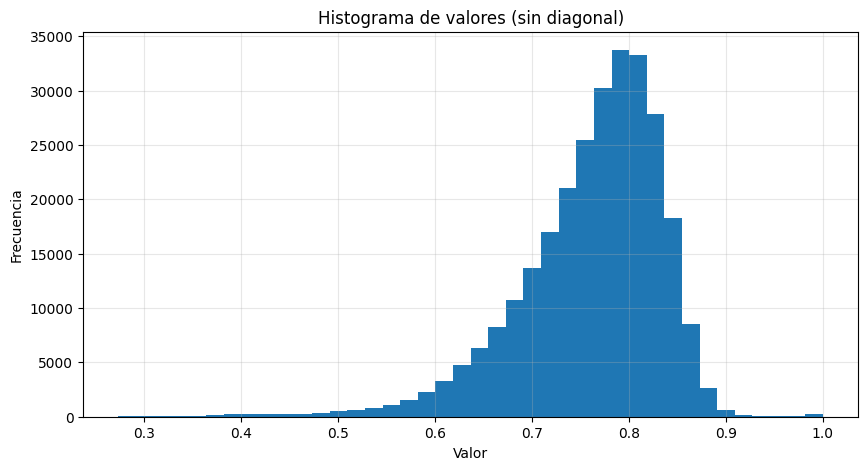

{'mean': 0.7611966429186923,
 'std': 0.07414481713264552,
 'min': 0.2734968066215515,
 'max': 1.0,
 'nan_count': 0,
 'nan_pct': 0.0,
 'percentiles': {1: 0.5182434916496277,
  5: 0.6255068182945251,
  25: 0.7235811352729797,
  50: 0.7751191854476929,
  75: 0.8126665353775024,
  95: 0.8530381917953491,
  99: 0.8784087896347046},
 'outliers': 7789}

In [5]:
analizar_matriz(df2)

In [6]:
def histograma_promedios_por_columna(df, bins=30):
    """
    Calcula el promedio por columna (excluyendo la diagonal)
    y grafica un histograma de esos promedios.
    """

    n = df.shape[0]
    promedios = []

    for col in range(df.shape[1]):
        col_vals = df.iloc[:, col].values.astype(float)

        # excluir la diagonal si aplica
        if col < n:
            col_vals = np.delete(col_vals, col)

        # eliminar NaNs
        col_vals = col_vals[~np.isnan(col_vals)]

        # guardar promedio de esa columna
        promedios.append(np.mean(col_vals))

    # --- Histograma ---
    plt.figure(figsize=(10,5))
    plt.hist(promedios, bins=bins)
    plt.title("Histograma de promedios por columna (sin diagonal)")
    plt.xlabel("Promedio de la columna")
    plt.ylabel("Frecuencia")
    plt.grid(alpha=0.3)
    plt.show()

    return None


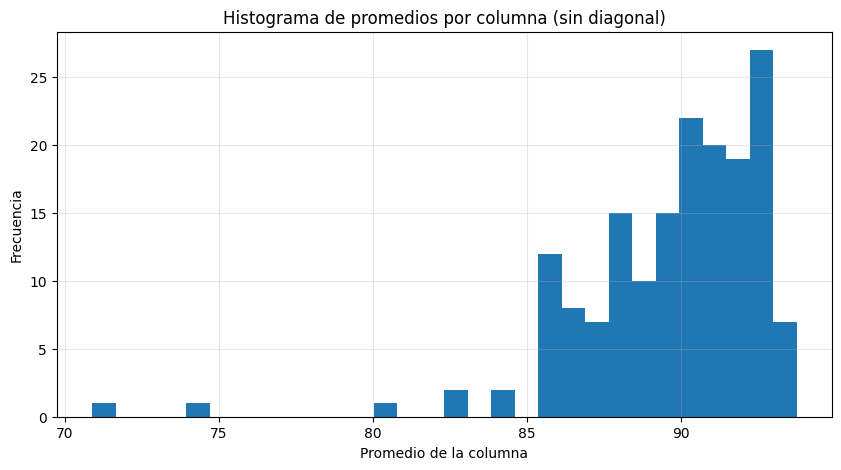

In [7]:
histograma_promedios_por_columna(df1)

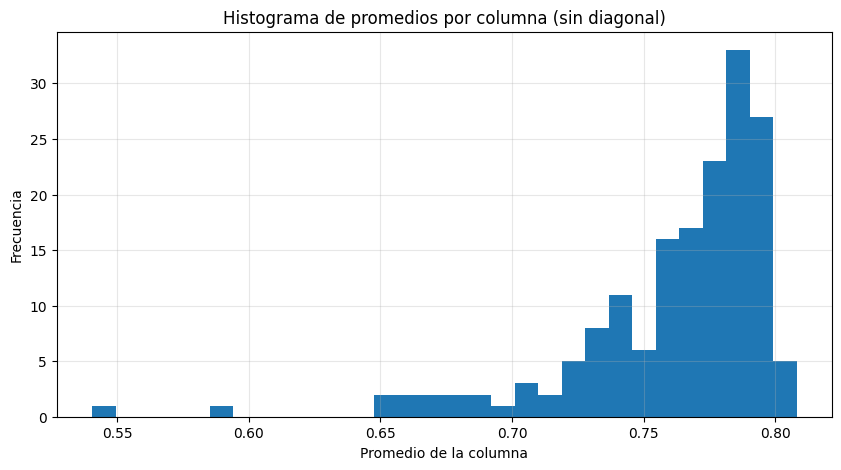

In [8]:
histograma_promedios_por_columna(df2)

In [9]:
import os
import pandas as pd

# ------------------ Rutas ------------------
root_dir = os.path.abspath(os.path.join(''))
TDA_cache = os.path.join(root_dir, 'cache/tda_matrix')
similarity_matrix_path = os.path.join(root_dir, 'flask_app/results/similarity_matrix.parquet')
confianza_path = os.path.join(root_dir, 'flask_app/results/confianza_matrix.parquet')
clima_path = os.path.join(root_dir, 'data/processed/clima/climatologia_merged.parquet')
suelo_path = os.path.join(root_dir, 'data/processed/suelo/suelo_merged.parquet')

evaluacion_path = os.path.join(root_dir, 'data/processed/cultivos/evaluacion_cultivos.parquet')
principales_path = os.path.join(root_dir, 'data/processed/cultivos/municipios_principales.parquet')

# ------------------ Cargar datos ------------------
df_series = pd.read_parquet(clima_path)
df_info = pd.read_parquet(suelo_path)
df_evaluacion = pd.read_parquet(evaluacion_path)
df_principales = pd.read_parquet(principales_path)

# ------------------ Preparación de df_info ------------------
if 'geometry' in df_info.columns:
    df_info.drop(columns=['geometry'], inplace=True)

# Mantener solo CVEGEO + variables
keep_info_cols = [c for c in df_info.columns if c not in ['FECHA','CVE_ENT','CVE_MUN','NOMGEO','NOM_ENT']]
df_info = df_info[keep_info_cols]
del df_series['CVE_ENT'], df_series['CVE_MUN'], df_series['NOMGEO'], df_series['NOM_ENT']

# Separar categóricas y numéricas
categorical_cols = df_info.select_dtypes(include=['object', 'category']).columns.tolist()
numeric_cols = df_info.select_dtypes(include=['int64','float64','int32','float32']).columns.tolist()
categorical_cols = [c for c in categorical_cols if c != 'CVEGEO']  # no incluir identificador

# ------------------ Preparación de df_series ------------------
df_info.sort_values(by=['CVEGEO'], inplace=True)
df_series.sort_values(by=['CVEGEO'], inplace=True)
df_evaluacion.sort_values(by=['CVEGEO'], inplace=True)
df_principales.sort_values(by=['CVEGEO'], inplace=True)
df_info.reset_index(drop=True, inplace=True)
df_series.reset_index(drop=True, inplace=True)
df_evaluacion.reset_index(drop=True, inplace=True)
df_principales.reset_index(drop=True, inplace=True)

serie_cols = [col for col in df_series.columns if col not in ['CVEGEO', 'Variable']]

# Identificar CVEGEO con NULLs y eliminar esas filas
# Para df_series
mask_null_series = df_series.isna().any(axis=1)
cvegeo_nulls_series = df_series.loc[mask_null_series, 'CVEGEO'].tolist()

# Para df_info
mask_null_info = df_info.isna().any(axis=1)
cvegeo_nulls_info = df_info.loc[mask_null_info, 'CVEGEO'].tolist()
# 1️⃣ Combinar las listas y obtener valores únicos
cvegeo_a_eliminar = list(set(cvegeo_nulls_series + cvegeo_nulls_info))
print("CVEGEO a eliminar:", len(set(cvegeo_a_eliminar)))

# 2️⃣ Filtrar ambos DataFrames para eliminar esas filas
df_series = df_series[~df_series['CVEGEO'].isin(cvegeo_a_eliminar)].reset_index(drop=True)
df_info   = df_info[~df_info['CVEGEO'].isin(cvegeo_a_eliminar)].reset_index(drop=True)
df_info = df_info[df_info['CVEGEO'].isin(df_evaluacion['CVEGEO'])].reset_index(drop=True)
df_series = df_series[df_series['CVEGEO'].isin(df_evaluacion['CVEGEO'])].reset_index(drop=True)
df_evaluacion = df_evaluacion[df_evaluacion['CVEGEO'].isin(df_info['CVEGEO'])].reset_index(drop=True)
df_principales = df_principales[df_principales['CVEGEO'].isin(df_info['CVEGEO'])].reset_index(drop=True)


CVEGEO a eliminar: 825


In [10]:
import pandas as pd    
# ------------------ Evaluación del modelo (nueva métrica basada en similitudes) ------------------
def evaluar_modelo_allstats(D: pd.DataFrame):
    cultivos = df_evaluacion.columns[3:]  # columnas de cultivos

    # ---- Preparación de datos ----
    cultivos_df = df_evaluacion.set_index('CVEGEO')[cultivos]
    cultivos_values = cultivos_df.values.astype(float)  # ahora con NaN como "sin datos"
    cvegeo_index = cultivos_df.index.to_list()
    cvegeo_to_row = {cve: idx for idx, cve in enumerate(cvegeo_index)}

    # Verificar correspondencia
    missing_cols = [c for c in D.columns if c not in cvegeo_to_row]
    if missing_cols:
        raise KeyError(f"Algunas columnas de D no están en df_evaluacion.CVEGEO: {missing_cols[:10]}...")

    D_index_list = D.index.to_list()
    if D_index_list != cvegeo_index:
        row_map = [cvegeo_to_row[cve] for cve in D_index_list]
        cultivos_values = cultivos_values[row_map]

    # ---- Variables base ----
    D_vals = D.values.astype(float)
    n_rows, n_cols = D_vals.shape

    col_indices = [cvegeo_to_row[c] for c in D.columns]
    y_matrix = cultivos_values[col_indices, :]  # puede contener NaN

    # cultivos con datos (NaN = no hay)
    col_masks = ~np.isnan(y_matrix)

    # ---- Construcción de matrices para broadcasting ----
    fila_vals_exp = cultivos_values[:, None, :]  # (n_rows, 1, n_cultivos)
    y_matrix_exp  = y_matrix[None, :, :]         # (1, n_cols, n_cultivos)
    col_masks_exp = col_masks[None, :, :]

    fila_masks_exp = ~np.isnan(fila_vals_exp)

    # ---- Máscaras de cultivos compartidos (ambos con datos) ----
    shared_mask = fila_masks_exp & col_masks_exp
    shared_counts = shared_mask.sum(axis=2)
    mask_contrib = shared_counts > 0

    # ---- Cálculo de S_cultivos ----
    diff_cultivos = np.abs(fila_vals_exp - y_matrix_exp)
    diff_cultivos = np.where(shared_mask, diff_cultivos, np.nan)
    S_cultivos_raw = 1 - diff_cultivos
    S_cultivos = np.nanmean(S_cultivos_raw, axis=2)
    S_cultivos[~mask_contrib] = np.nan

    cultivos_df = pd.DataFrame(S_cultivos, columns=D.columns, index=D.index)

    return cultivos_df



cultivo = evaluar_modelo_allstats(df2)


/tmp/ipykernel_7681/317727039.py:48: RuntimeWarning: Mean of empty slice
  S_cultivos = np.nanmean(S_cultivos_raw, axis=2)


In [11]:
values1 = cultivo.values.flatten()
values2 = df2.values.flatten()

# Si quieres ignorar NaNs
mask = ~np.isnan(values1) & ~np.isnan(values2)
values1_clean = values1[mask]
values2_clean = values2[mask]

# Calculamos la correlación de Pearson
correlation = np.corrcoef(values1_clean, values2_clean)[0, 1]

print("Correlación:", correlation)

Correlación: 0.14964168062686292


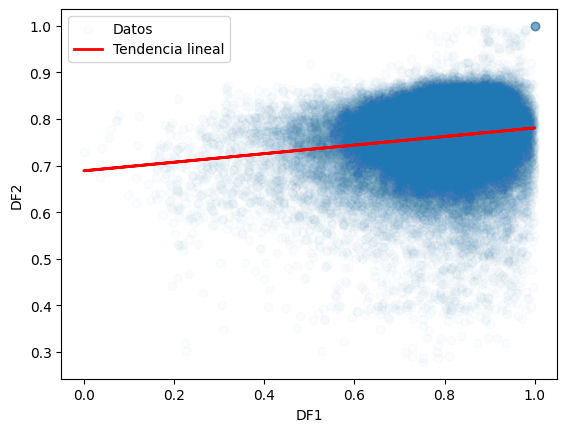

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Tomar 10% de los puntos
n = len(values1_clean)
idx = np.random.choice(n, size=int(n*0.2), replace=False)
x_sample = values1_clean[idx]
y_sample = values2_clean[idx]

# Scatter plot
plt.scatter(x_sample, y_sample, alpha=0.02, label='Datos')

# Línea de tendencia
coef = np.polyfit(x_sample, y_sample, 1)  # 1 -> lineal
y_trend = np.polyval(coef, x_sample)
plt.plot(x_sample, y_trend, color='red', linewidth=2, label='Tendencia lineal')

# Etiquetas
plt.xlabel('DF1')
plt.ylabel('DF2')
plt.legend()
plt.show()

N=272275  Promedio=0.1034  Std=0.0863  Min=0.0000  Max=0.8268


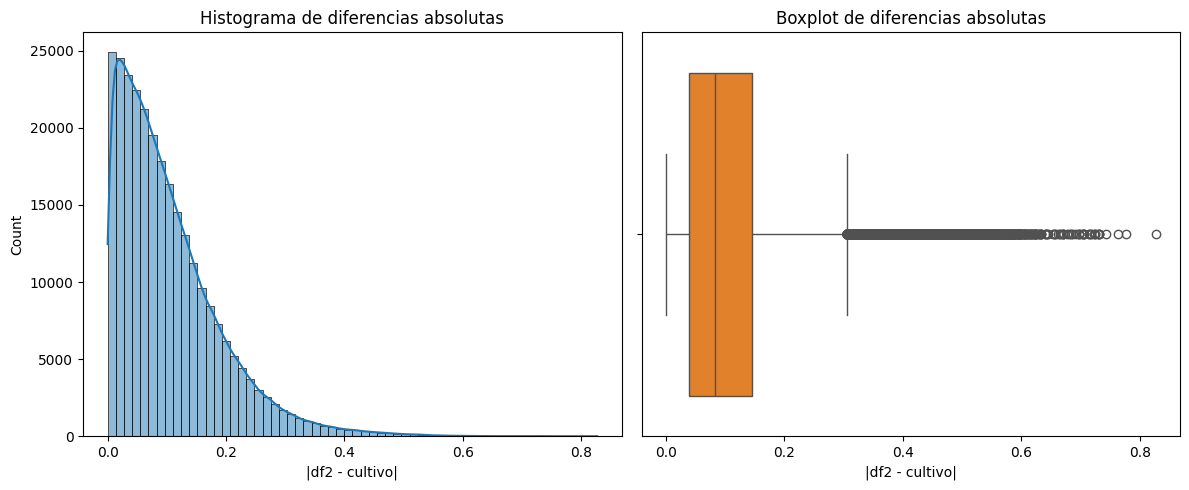

In [13]:
# ...existing code...
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# diferencia absoluta
df_diff = (df2 - cultivo).abs()

# valores (ignorar NaNs)
vals = df_diff.values.flatten()
vals = vals[~np.isnan(vals)]

# estadísticas rápidas
print(f"N={len(vals)}  Promedio={vals.mean():.4f}  Std={vals.std():.4f}  Min={vals.min():.4f}  Max={vals.max():.4f}")

# histograma + KDE y boxplot
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(vals, kde=True, bins=60, color='C0')
plt.xlabel('|df2 - cultivo|')
plt.title('Histograma de diferencias absolutas')

plt.subplot(1,2,2)
sns.boxplot(x=vals, color='C1')
plt.xlabel('|df2 - cultivo|')
plt.title('Boxplot de diferencias absolutas')

plt.tight_layout()
plt.show()
# ...existing code...

In [14]:
import numpy as np

# --- 1. PREPARACIÓN DE DATOS ---
# Se asume que 'cultivo' y 'df2' son tus matrices cargadas
values1 = cultivo.values.flatten()
values2 = df2.values.flatten()

# Creamos una máscara para excluir pares donde al menos un valor es NaN
mask = ~np.isnan(values1) & ~np.isnan(values2)
values1_clean = values1[mask]
values2_clean = values2[mask]

# --- 2. CÁLCULO DEL ERROR CUADRÁTICO MEDIO (MSE) ---
# MSE: Mide el error cuadrático promedio entre los valores.
# La cuadratura penaliza las diferencias grandes.
diferencia = values1_clean - values2_clean
mse = np.mean(diferencia**2)

# --- 3. CÁLCULO DEL RMSE (Raíz del Error Cuadrático Medio) ---
# RMSE: Convierte el MSE de nuevo a las unidades originales de tus datos.
rmse = np.sqrt(mse)

# --- 4. IMPRESIÓN DE RESULTADOS ---
print("--- Raíz del Error Cuadrático Medio (RMSE) ---")
print(f"RMSE (Diferencia Típica): {rmse:.4f}")

print("\nInterpretación:")
print("El RMSE representa la diferencia promedio esperada, en las unidades originales, entre el valor de 'cultivo' y 'df2' en una celda.")
print(f"Un valor de {rmse:.4f} indica que las dos matrices tienen una alta similitud de magnitud.")

--- Raíz del Error Cuadrático Medio (RMSE) ---
RMSE (Diferencia Típica): 0.1347

Interpretación:
El RMSE representa la diferencia promedio esperada, en las unidades originales, entre el valor de 'cultivo' y 'df2' en una celda.
Un valor de 0.1347 indica que las dos matrices tienen una alta similitud de magnitud.
